<a href="https://colab.research.google.com/github/HENICHE-Thilleli/Time-Series-Forecasting-Using-Machine-Learning/blob/main/Decision%20trees/descisiontrees_features_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Charger les données
df = pd.read_csv('/content/drive/MyDrive/external.csv', parse_dates=True, sep=";")
df['date'] = pd.to_datetime(df['date']) # Convertir la colonne 'date' en objets datetime
df1 = df[['date', 'PriceUSD','HashRate']]
print(df1)

          date     PriceUSD      HashRate
0   2015-01-02   315.942732  3.333450e+05
1   2015-01-03   285.647310  3.272842e+05
2   2015-01-04   263.334575  3.474869e+05
3   2015-01-05   275.003852  3.151626e+05
4   2015-01-06   287.549521  3.192031e+05
..         ...          ...           ...
906 2017-06-26  2426.365051  5.023770e+06
907 2017-06-27  2530.345536  4.634604e+06
908 2017-06-28  2562.792264  5.554450e+06
909 2017-06-29  2540.443032  4.245439e+06
910 2017-06-30  2452.712064  5.448314e+06

[911 rows x 3 columns]


In [ ]:
#chargement du fichier global
path='/content/drive/MyDrive/global.csv'
df2=pd.read_csv(path,parse_dates=True, sep=";")
df2['date'] = pd.to_datetime(df['date'])
df2=df2[['date','total_fee','total_received_satoshi','total_sent_satoshi','mean_fee_satoshi','mean_feeUSD','mean_fee_for100','nb_transactions','nb_payments','mean_nb_inputs','mean_nb_outputs','nb_mining','total_mining_satoshi','newly_created_coins','self_spent_satoshi','total_received','volume_without_self']]
df3=pd.merge(df2, df1)
print(df3)
df4=df3.copy()

          date    total_fee  total_received_satoshi  total_sent_satoshi  \
0   2015-01-02    801373971          45473028339385      45058028339385   
1   2015-01-03   1159934218          73370568521080      72955568521080   
2   2015-01-04   1196476043          82635189454578      82220189454578   
3   2015-01-05   2159195328         115159442449532     114726942449532   
4   2015-01-06   1608443040         112439228285641     112051728285641   
..         ...          ...                     ...                 ...   
906 2017-06-26  25777375442         174805378701333     174640378701333   
907 2017-06-27  35993152232         375012739382430     374842739382430   
908 2017-06-28  38384859820         287624055555912     287452805555912   
909 2017-06-29  38663204682         282904720130478     282717220130478   
910 2017-06-30  33153365173         317698686929569     317543686929569   

     mean_fee_satoshi   mean_feeUSD  mean_fee_for100  nb_transactions  \
0        13609.829337  4.2

In [ ]:
FEATURES = ['mean_feeUSD', 'nb_transactions', 'nb_payments' ]
TARGET = ['PriceUSD']

train = df4[:int(len(df4)*0.7)]
print(len(train))
test = df4[int(len(df4)*0.7):]
print(len(test))
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

637
274


In [ ]:
# Entraînement et prédiction avec l'arbre de décision
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = np.mean(y_pred - y_test.values.reshape(-1, 1))

print(f"Biais : {bias:.2f}")
print("MSE: ", mse)
print(f"R²: {r2:.4f}")

Biais : -586.05
MSE:  720060.8301428542
R²: -0.9097


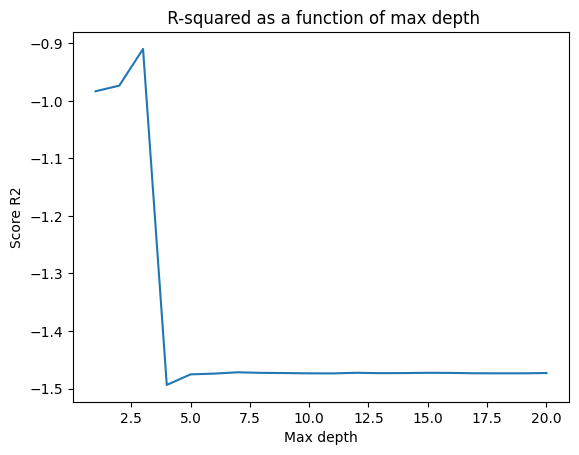

In [ ]:
# Tracer le graphique des scores R2 en fonction de la profondeur de l'arbre
max_depths = range(1, 21)
r2_scores = []

for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.plot(max_depths, r2_scores)
plt.xlabel('Max depth')
plt.ylabel('Score R2')
plt.title(' R-squared as a function of max depth')
#plt.savefig('/content/drive/MyDrive/maxdepth2.png')
plt.show()

911
274
637


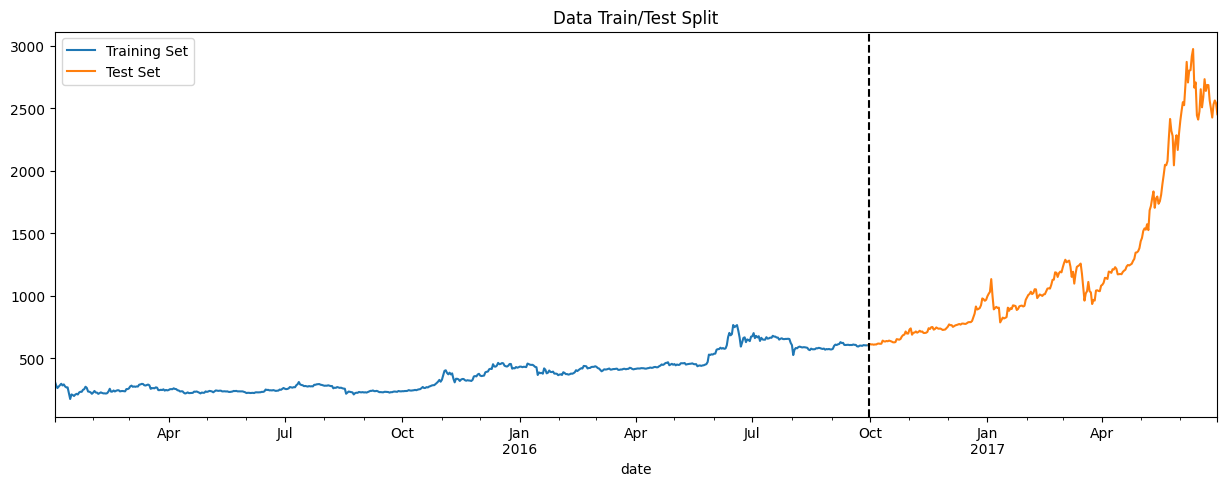

In [ ]:
dfplot=df[['date', 'PriceUSD']]
dfplot = dfplot.set_index('date')
dfplot.index = pd.to_datetime(dfplot.index)
train = dfplot[:int(len(df1)*0.7)]
test = dfplot[int(len(df1)*0.7):]
print(len(df1))
print(len(test))
print(len(train))
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline(df1.iloc[int(len(df1)*0.7),0], color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

<ipython-input-9-d7ea8c54e0ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfplot['prediction'] = y_pred


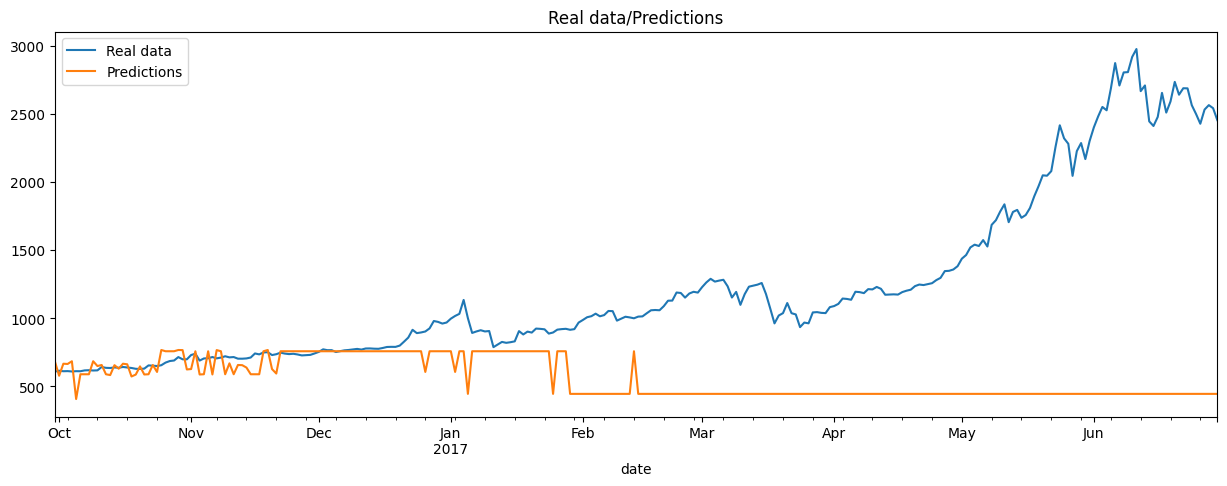

In [ ]:
# Tracer le graphique des prédictions et des données réelles
test = df[int(len(df1)*0.7):]
dfplot = test[['date', 'PriceUSD']]
dfplot['prediction'] = y_pred
dfplot = dfplot.set_index('date')

fig, ax = plt.subplots(figsize=(15, 5))
dfplot.plot(ax=ax, title='Real data/Predictions')
ax.legend(['Real data', 'Predictions'])
#plt.savefig('/content/drive/MyDrive/decisiontreesglobal.png')
dfplot.to_csv('/content/drive/MyDrive/decisiontreesglobal.csv')
plt.show()